Number of rows: 2000
Number of columns: 21
Missing values: 
battery_power      0
bluetooth          0
clock_speed        0
dual_sim           0
front_camera       0
four_g             0
internal_memory    0
depth              0
width              0
n_cores            0
primary_camera     0
px_height          0
px_width           0
ram                0
screen_height      0
screen_width       0
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64


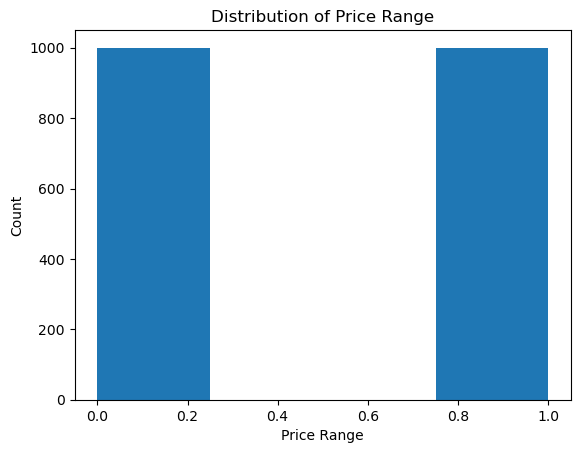

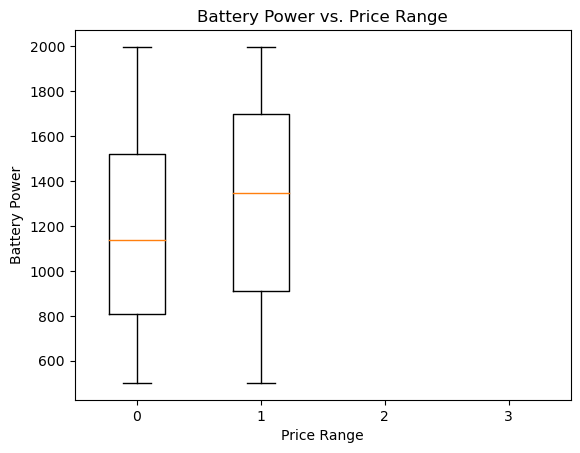

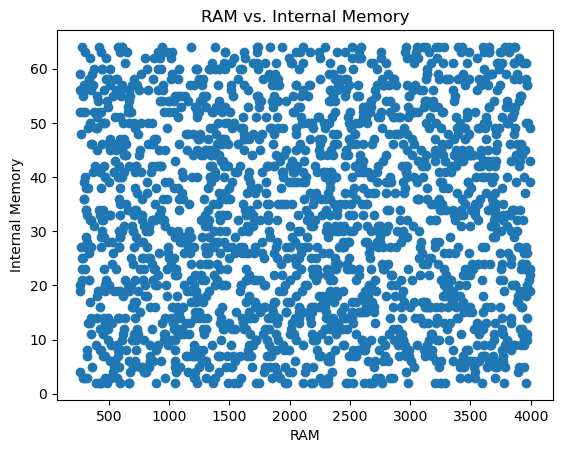

In [2]:
#Import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt

# Load  our dataset
data_url = 'https://raw.githubusercontent.com/nick-edu/dmmldl/master/MobilePrice.csv'

#raise a try except block
try:
    mobile_data = pd.read_csv(data_url)
except:
    print("Error loading dataset")

# Count rows and columns, and check for missing values
print(f"Number of rows: {len(mobile_data)}")
print(f"Number of columns: {len(mobile_data.columns)}")
print(f"Missing values: \n{mobile_data.isnull().sum()}")

# Visualize  our data
# Histogram of the price range
plt.hist(mobile_data['price_range'], bins=4)
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Distribution of Price Range')
plt.show()

# Boxplot of the battery power vs. price range
plt.boxplot([mobile_data[mobile_data['price_range']==0]['battery_power'],
             mobile_data[mobile_data['price_range']==1]['battery_power'],
             mobile_data[mobile_data['price_range']==2]['battery_power'],
             mobile_data[mobile_data['price_range']==3]['battery_power']])
plt.xticks([1, 2, 3, 4], ['0', '1', '2', '3'])
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.title('Battery Power vs. Price Range')
plt.show()

# Scatterplot of RAM vs. internal memory
plt.scatter(mobile_data['ram'], mobile_data['internal_memory'])
plt.xlabel('RAM')
plt.ylabel('Internal Memory')
plt.title('RAM vs. Internal Memory')
plt.show()

In [6]:
# Navigating to our data
mobile_data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera,four_g,internal_memory,depth,width,n_cores,...,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0


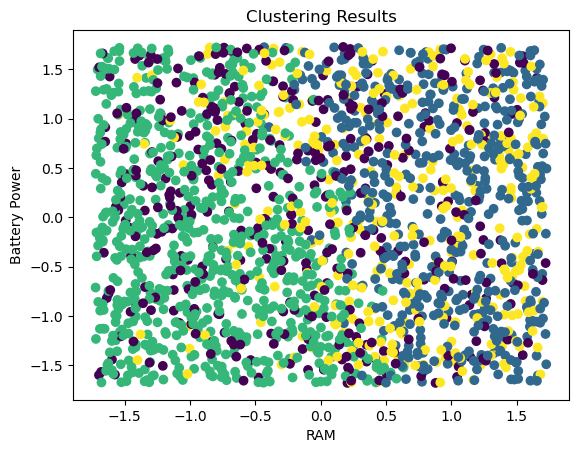

In [13]:
#Taking the functions we need
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select desired columns
selected_columns = ['battery_power', 'clock_speed', 'front_camera', 'internal_memory', 'n_cores', 'primary_camera', 'px_height', 'px_width', 'ram', 'screen_height', 'screen_width', 'talk_time', 'price_range']
selected_data = mobile_data[selected_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)
#Building a block
try:
    # Perform clustering
    kmeans = KMeans(n_clusters=4, random_state=42)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_

    # Plot the results
    plt.scatter(scaled_data[:, 8], scaled_data[:, 0], c=labels)
    plt.xlabel('RAM')
    plt.ylabel('Battery Power')
    plt.title('Clustering Results')
    plt.show()

except:
    print("Error performing clustering")

